In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook 
import numpy as np
import datetime
import pandas_datareader.data as web

data_source='yahoo'

start_date='2017-01-01'
end_date='2020-08-24'


us_dict={
    'Amazon':'AMZN',
    'Apple': 'AAPL',
    'Berkshire Hathaway':'BRK-B',
    'Facebook': 'FB',
    'Google':'Googl',
    'Home Depot':'HD',
    'Intel':'INTC',
    'Johnson and Johnson':'JNJ',
    'JP Morgan Chase':'JPM',
    'Mastercard':"MA",
    "Microsoft":"MSFT",
    "Proctor and Gamble":'PG',
    'United Healthcare': 'UNH',
    'Visa':'V',
    "Verizon":'VZ'
    }
us_companies=sorted(us_dict.items(), key=lambda x: x[1])
us_data=web.DataReader(list(us_dict.values()), data_source, start_date, end_date)
us_close=us_data["Close"]
us_open=us_data["Open"]
us_close=np.array(us_close).T
us_open=np.array(us_open).T 




us_rows, us_cols=us_close.shape

us_movements=np.zeros([us_rows,900])

for i in range(0, us_rows):
    us_movements[i,:]=np.subtract(us_close[i,:900], us_open[i,:900])


# for i in range(0, len(us_companies)):
#     print('Company: {}, Change: {}'.format(us_companies[i][0], sum(us_movements[i][:])))

china_dict={
    "Tencent":"0700.HK", 
    "HSBC":"0005.HK",
    "CCB":"0939.HK",
    "China Mobile":"0941.HK",
    "ABC":"1288.HK",
    "AIA":"1299.HK",
    "ICBC":"1398.HK",
    'PSBC':"1658.HK",
    "PING AN":"2318.HK",
    "CHINA LIFE":"2628.HK", 
    "Meituan":"3690.HK",
    "CM BANK":"3698.HK",
    "Bank of China":"3988.HK",
    "JD.com":"9618.HK",
    "Alibaba":"9988.HK"
}
china_companies=sorted(china_dict.items(), key=lambda x: x[1])
china_data=web.DataReader(list(china_dict.values()), data_source, start_date, end_date)
china_close=np.array(china_data["Close"]).T
china_open=np.array(us_data["Open"]).T
china_close*=.13
china_open*=.13

china_rows, china_cols=china_close.shape

china_movements=np.zeros([china_rows,china_cols])

for i in range(0, china_rows):
    china_movements[i,:]=np.subtract(china_close[i,:], china_open[i,:900])

col_mean=np.nanmean(china_movements, axis=0)
inds=np.where(np.isnan(china_movements))
china_movements[inds]=np.take(col_mean, inds[1])

movements=np.concatenate((us_movements, china_movements), axis=0)
companies=us_companies+china_companies






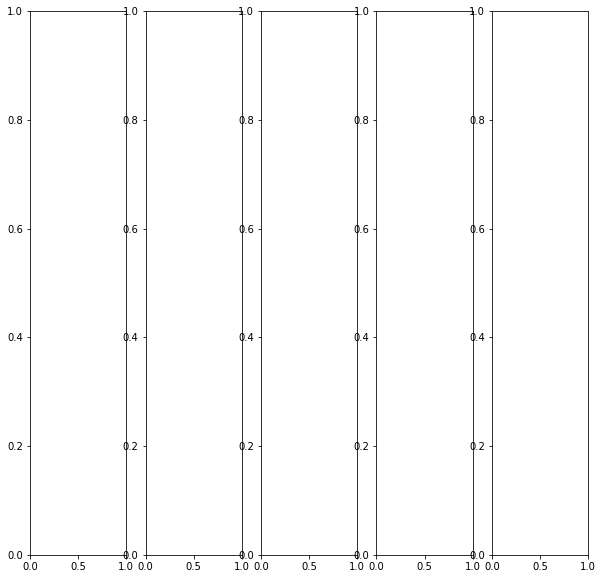

In [23]:
fig, axs=plt.subplots(1,5, figsize=(10,10))




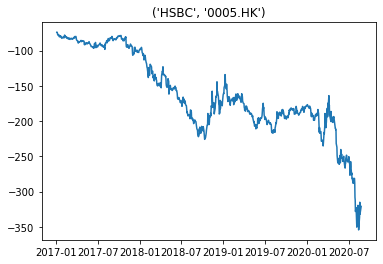

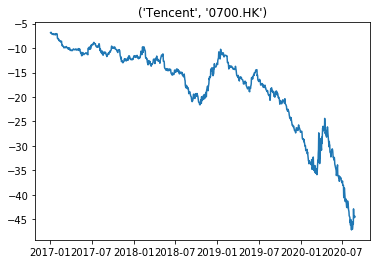

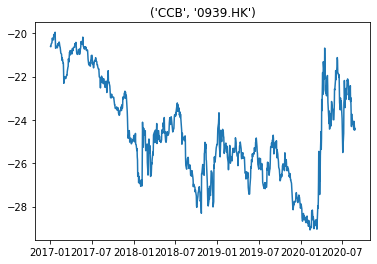

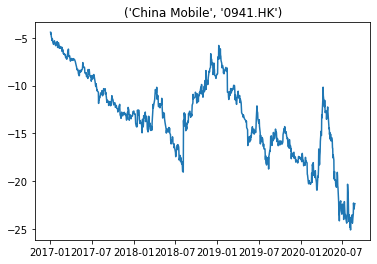

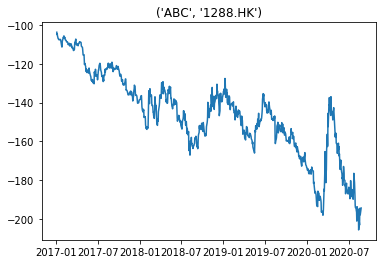

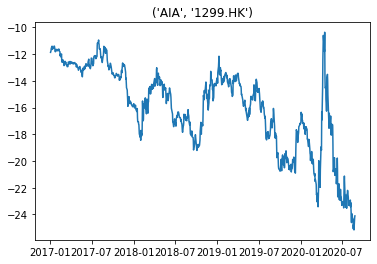

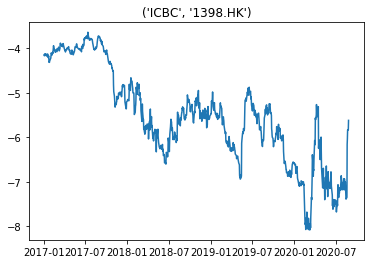

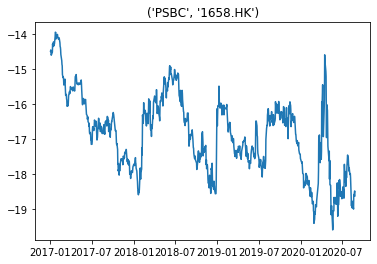

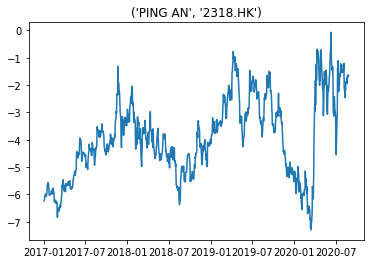

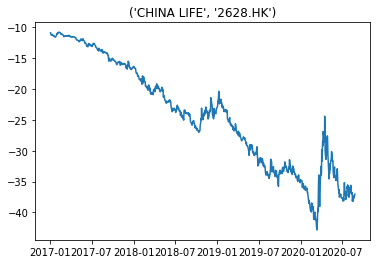

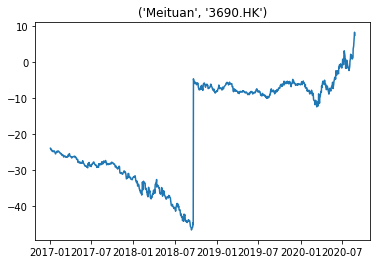

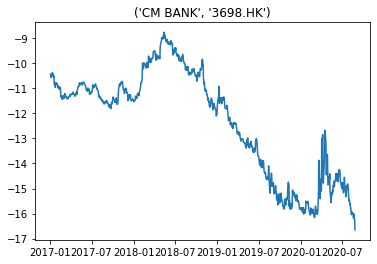

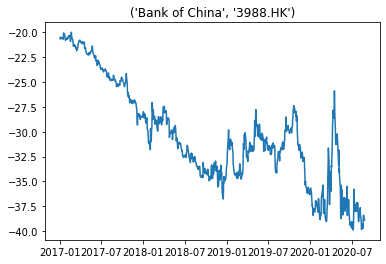

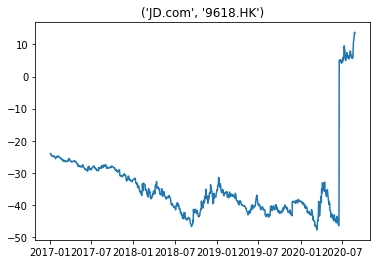

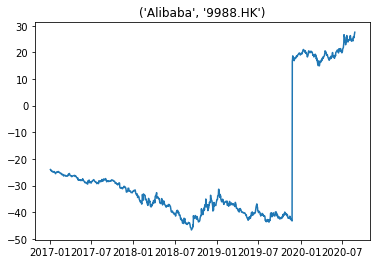

In [43]:
c_mv_dict={}
for i in range(15):
        c_mv_dict[china_companies[i]]=np.mean(china_movements[i])
        plt.plot(china_data[:900].index,china_movements[i])
        #plt.ylim(-100,0)
        plt.title(china_companies[i])
        plt.show()
    

In [35]:
c_mv_dict

{('HSBC', '0005.HK'): -162.2106562133789,
 ('Tencent', '0700.HK'): -18.084354898961386,
 ('CCB', '0939.HK'): -24.583312000322348,
 ('China Mobile', '0941.HK'): -13.375136642201742,
 ('ABC', '1288.HK'): -146.58689927273858,
 ('AIA', '1299.HK'): -16.01404859161377,
 ('ICBC', '1398.HK'): -5.530306882725822,
 ('PSBC', '1658.HK'): -16.86015068689982,
 ('PING AN', '2318.HK'): -3.9090826618618433,
 ('CHINA LIFE', '2628.HK'): -24.34173300379647,
 ('Meituan', '3690.HK'): -18.766996422555273,
 ('CM BANK', '3698.HK'): -12.361852593840494,
 ('Bank of China', '3988.HK'): -30.35858223585288,
 ('JD.com', '9618.HK'): -33.99045020715049,
 ('Alibaba', '9988.HK'): -23.91637495696766}